In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
import warnings
warnings.filterwarnings("ignore")


In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def half_life(series):
    """
    Input:  pandas Series (stationary) — monthly data
    Output: [half_life_years, half_life_months, speed_of_adjustment]
    """
    # Ensure Pandas Series
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    
    s = series.dropna().astype(float)

    # lag values
    s_lag = s.shift(1).dropna()
    s = s.loc[s_lag.index]

    # AR(1)
    X = sm.add_constant(s_lag)
    res = sm.OLS(s, X).fit()
    phi = float(res.params[1])

    # If no mean reversion
    if phi <= 0 or phi >= 1:
        return [np.inf, np.inf, (1 - phi)]

    # half-life in months
    hl_months = np.log(0.5) / np.log(phi)

    # half-life in years
    hl_years = hl_months / 12

    # speed of adjustment = 1 - phi
    speed = 1 - phi

    return [hl_years, hl_months, speed]


In [4]:
df=pd.read_csv('final_series.csv')

In [8]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df

,observation_date,ln_RER
0,2015-08-01,5.033286
1,2015-09-01,5.039785
2,2015-10-01,5.012172
3,2015-11-01,5.026034
4,2015-12-01,5.034736
...,...,...
110,2024-10-01,5.115050
111,2024-11-01,5.121743
112,2024-12-01,5.138447
113,2025-01-01,5.161736


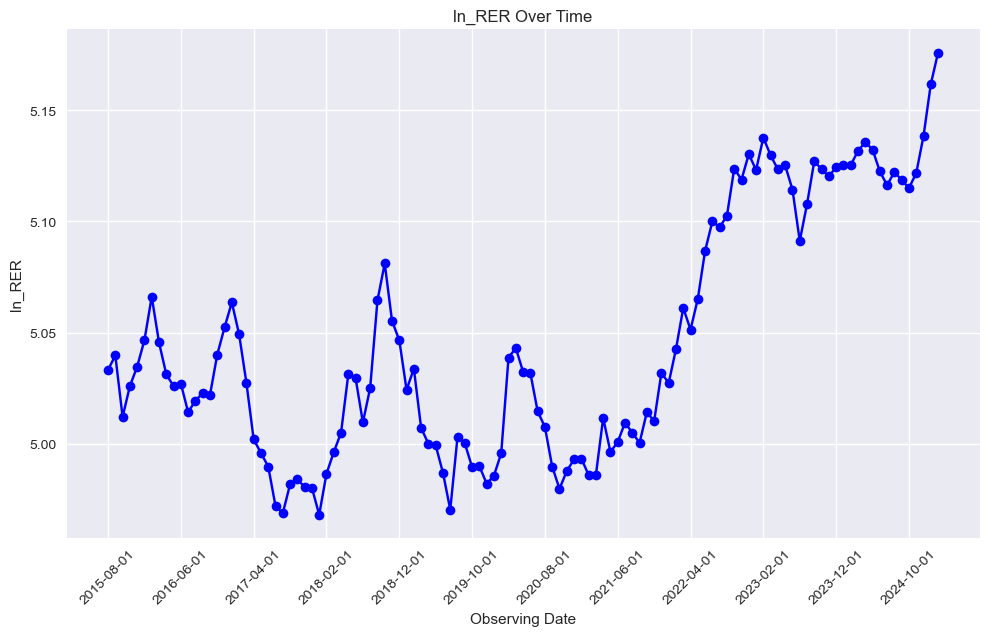

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df["observation_date"], df['ln_RER'], marker='o', linestyle='-', color='b')

plt.xlabel("Observing Date")
plt.ylabel("ln_RER")
plt.title("ln_RER Over Time")
plt.grid(True)
plt.tight_layout()

# Show only every 10th x-axis tick
plt.xticks(df["observation_date"][::10], rotation=45)

plt.show()


In [86]:
s=df
s_1=df[df['observation_date']<='2022-04-01']
s_2=df[(df['observation_date']>='2022-05-01')&(df['observation_date']<='2024-12-01')]
s_3=df[df['observation_date']>='2025-01-01']

In [88]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(s_2['ln_RER'],autolag='AIC')
print(f'ADF Test Result')
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of lags used:", result[2])
print("Number of observations used:", result[3])

ADF Test Result
ADF Statistic: -3.0422384492235737
p-value: 0.031133742007106148
Number of lags used: 3
Number of observations used: 28


In [84]:
result=half_life(s_2['ln_RER'])
print(f'Half Life in Year = {result[0]}')
print(f'Half Life in Month = {result[1]}')
print(f'speed of adjustment(%)= {result[0]*100}')

Half Life in Year = 0.11490396880641152
Half Life in Month = 1.3788476256769382
speed of adjustment(%)= 11.490396880641152


In [85]:
from scipy import stats
tstat, pval = stats.ttest_1samp(s_2['ln_RER'].dropna(), 0)
print('Mean Test (t-Test for μ = 0)')
print("t-statistic:", tstat)
print("p-value:", pval)

Mean Test (t-Test for μ = 0)
t-statistic: 1819.6383373584533
p-value: 1.6190682658755322e-79


In [72]:
s_1

,observation_date,ln_RER
0,2015-08-01,5.033286
1,2015-09-01,5.039785
2,2015-10-01,5.012172
3,2015-11-01,5.026034
4,2015-12-01,5.034736
...,...,...
76,2021-12-01,5.031984
77,2022-01-01,5.027361
78,2022-02-01,5.042679
79,2022-03-01,5.061141


In [73]:
df

,observation_date,ln_RER
0,2015-08-01,5.033286
1,2015-09-01,5.039785
2,2015-10-01,5.012172
3,2015-11-01,5.026034
4,2015-12-01,5.034736
...,...,...
110,2024-10-01,5.115050
111,2024-11-01,5.121743
112,2024-12-01,5.138447
113,2025-01-01,5.161736
